In [159]:

from pyfiglet import Figlet

f_f = Figlet(font='slant')
print(f_f.renderText('Its all about AI and crypto now'))

    ______                ____         __                __     ___    ____
   /  _/ /______   ____ _/ / /  ____ _/ /_  ____  __  __/ /_   /   |  /  _/
   / // __/ ___/  / __ `/ / /  / __ `/ __ \/ __ \/ / / / __/  / /| |  / /  
 _/ // /_(__  )  / /_/ / / /  / /_/ / /_/ / /_/ / /_/ / /_   / ___ |_/ /   
/___/\__/____/   \__,_/_/_/   \__,_/_.___/\____/\__,_/\__/  /_/  |_/___/   
                                                                           
                   __                         __                              
  ____ _____  ____/ /  ____________  ______  / /_____     ____  ____ _      __
 / __ `/ __ \/ __  /  / ___/ ___/ / / / __ \/ __/ __ \   / __ \/ __ \ | /| / /
/ /_/ / / / / /_/ /  / /__/ /  / /_/ / /_/ / /_/ /_/ /  / / / / /_/ / |/ |/ / 
\__,_/_/ /_/\__,_/   \___/_/   \__, / .___/\__/\____/  /_/ /_/\____/|__/|__/  
                              /____/_/                                        



## Etherium prediction with Artificial Intelligence (Deep Learning via LSTM Neural Networks)

In [160]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


Importerar dom bibliotek som krävs.

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

Via API på Coingecko som är en kryptosida har jag laddat med data från 2018-01-01 till 2022-11-08 till en csv-fil som heter "testa_sammanslagen_data.csv

In [162]:
# Läs in data från CSV-filen
data = pd.read_csv("testa_sammanslagen_data.csv")
# Skriver ut den första raden för att se kolumnrubrikerna
print(data.head(0))
# Välj endast kolumnerna 'Date' och 'Price'
data = data.loc[:,['Date','Price']]
# Skriver ut de första fem raderna av den nya dataramen
print(data.head(5))


Empty DataFrame
Columns: [Date, Price]
Index: []
         Date  Price
0  2018-01-01   6345
1  2018-01-02   7155
2  2018-01-03   7879
3  2018-01-04   7959
4  2018-01-05   8199


In [163]:
data.columns
data.head

<bound method NDFrame.head of             Date  Price
0     2018-01-01   6345
1     2018-01-02   7155
2     2018-01-03   7879
3     2018-01-04   7959
4     2018-01-05   8199
...          ...    ...
1767  2022-11-04  17138
1768  2022-11-05  18099
1769  2022-11-06  17908
1770  2022-11-07  17208
1771  2022-11-08  17029

[1772 rows x 2 columns]>

Ovan kan ses att datasettet har 1772 rader och 2 kulumner.

In [164]:
# Ställer in kolumnen 'Date' som index
data = data.set_index('Date')

# Konverterar indexet till ett DateTimeIndex-objekt
data.index = pd.to_datetime(data.index,unit='ns')

# Skriv ut det nya indexet
print(data.index)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02',
               '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06',
               '2022-11-07', '2022-11-08'],
              dtype='datetime64[ns]', name='Date', length=1772, freq=None)


In [165]:
# Tilldelar strängen 'Price'(2:a kolumnen i datasettet) till variabeln aim
# aim variabeln kan sedan användas för att referera till kolumnen 'Price'

aim='Price'

In [166]:
# Jag delar upp mitt datasett i en träningssekvens och en testsekvens samt definierar en funktion 'line_plot' 
# för att rita en linjediagram. 

train_data = data.iloc[:1450]
test_data = data.iloc[1450:]

def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('ETHEREUM', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    ax.xaxis.set_major_locator(plt.MaxNLocator(8)) 

In [167]:
# Printar ut train_data för att se att det ser okey ut.
print(train_data)

            Price
Date             
2018-01-01   6345
2018-01-02   7155
2018-01-03   7879
2018-01-04   7959
2018-01-05   8199
...           ...
2021-12-17  35881
2021-12-18  35540
2021-12-19  36382
2021-12-20  35897
2021-12-21  36135

[1450 rows x 1 columns]


In [168]:
# Printar ut test_data för att se att det också ser okey ut.
print(test_data)

            Price
Date             
2021-12-22  36854
2021-12-23  36282
2021-12-24  37388
2021-12-25  37017
2021-12-26  37523
...           ...
2022-11-04  17138
2022-11-05  18099
2022-11-06  17908
2022-11-07  17208
2022-11-08  17029

[322 rows x 1 columns]


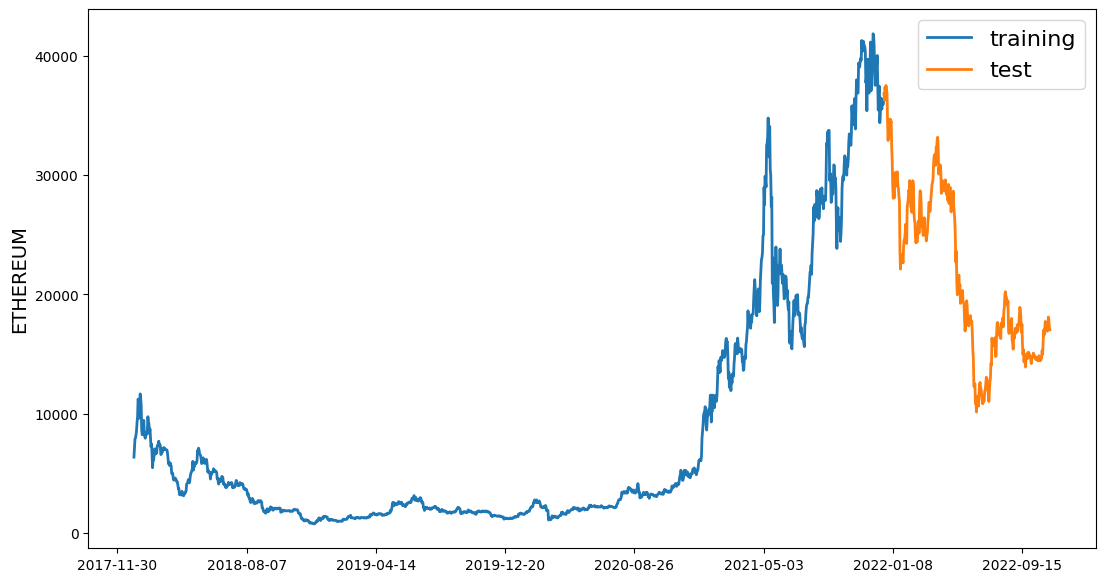

In [169]:
# Plottar ut en kurva över träningsdata och testdata med hjälp av funktionen 'line_plot'.
line_plot(train_data[aim], test_data[aim], 'training', 'test', title='')

### Normalisering av data. 
Normalisering är en vanlig förbehandlingsteknik inom maskininlärning för att skala data till ett gemensamt intervall eller en gemensam fördelning, vilket kan förbättra prestanda och konvergens för många algoritmer. 

In [170]:
# Denna funktion normaliserar data så att den första punkten blir noll och sedan beräknar avvikelserna 
# från denna baslinje. Detta innebär att den första datapunkten i varje serie blir 0 och alla andra punkter 
# representerar en relativ förändring från den första punkten.

# Varje värde i dataserien divideras med det första värdet i serien. Sedan dras -1 av. Detta leder till att det första värdet 
# blir 0 och alla andra värden representerar den relativa förändringen från det första värdet.
def normalise_zero_base(ethereum_series):
    return ethereum_series / ethereum_series.iloc[0] - 1


# Denna funktion normaliserar data till intervallet [0, 1] genom att skala varje värde baserat på det minsta och största värdet i datamängden.
def normalise_min_max(ethereum_series):
    return (ethereum_series - ethereum_series.min()) / (data.max() - ethereum_series.min())

In [227]:
#  Denna funktion extraherar fönster av data från en serie av Ethereum-priser, normaliserar varje fönster om det behövs, 
# och returnerar en uppsättning av dessa fönster som en numpy-array för användning i en LSTM-modell.
def extract_window_data(ethereum_series, window_len=5, zero_base=True):
    window_data = []
    for start_idx in range(len(ethereum_series) - window_len):
        window_prices = ethereum_series[start_idx: (start_idx + window_len)].copy()
        if zero_base:
            window_prices = normalise_zero_base(window_prices)
        window_data.append(window_prices.values)
    return np.array(window_data)


# Funktionen 'prepare_data' förbereder data för att träna och testa LSTM-modellen.
# Funktionen använder 'extract_window_data' för att extrahera fönster av data från tränings- och testdatamängderna (train_data och test_data). 
def prepare_data(aim, window_len=10, zero_base=True):
    train_window_data = extract_window_data(train_data, window_len, zero_base)
    test_window_data = extract_window_data(test_data, window_len, zero_base)
    train_target_values = train_data[aim][window_len:].values
    test_target_values = test_data[aim][window_len:].values
    if zero_base:
        train_target_values = train_target_values / train_data[aim][:-window_len].values - 1
        test_target_values = test_target_values / test_data[aim][:-window_len].values - 1

    return train_data, test_data, train_window_data, test_window_data, train_target_values, test_target_values


def prepare_future_data(aim, window_len=10, zero_base=True, future_data=None):
    if future_data is None:
        return None, None
    
    future_window_data = extract_window_data(future_data, window_len, zero_base)
    future_target_values = future_data[aim][window_len:].values
    if zero_base:
        future_target_values = future_target_values / future_data[aim][:-window_len].values - 1
    
    return future_window_data, future_target_values

In [228]:

def build_lstm_model(input_data, output_size, neurons, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model
np.random.seed(245)
window_len = 5
zero_base = True
lstm_neurons = 50
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.24
optimizer = 'adam'
train_data, test_data, train_window_data, test_window_data, train_target_values, test_target_values = prepare_data(aim,window_len, zero_base)
     

#### print(train_window_data.shape), nedan, kommer visa de faktiska dimensionerna på  träningsdatan och ge en uppfattning om storleken på träningsdatan. Detta är användbart för att kontrollera att datan har rätt form och storlek innan den matas in i  modellen.

In [229]:
print(train_window_data.shape)

(1445, 5, 1)


## (1445, 5, 1) betyder följande:

Det finns totalt 1445 tidsfönster.
Varje tidsfönster har 5 tidssteg.
Varje tidssteg har 1 funktion (variabel).
Jag har 1445 exempel av tidssekvensdata för träning, där varje exempel består av en sekvens av 5 tidssteg, och varje tidssteg innehåller endast en variabel.

Detta är den form man förväntar sig att träningsdata ska ha för att matas in i en LSTM-modell. Varje tidsfönster representerar en sekvens av datapunkter över tid, och LSTM-modellen kommer att träna på dessa sekvenser för att göra förutsägelser.

In [174]:
# Bygger LSTM-modellen med de specificerade parametrarna
model = build_lstm_model(
    train_window_data, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)

# Tränar modellen med träningsdata och validerar den med testdata
modelfit = model.fit(
    train_window_data, train_target_values, validation_data=(test_window_data, test_target_values), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
     

/mnt/c/Users/aras/python_iths/iths_2023_sep_dec/aras_venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0142 - val_loss: 0.0063
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - val_loss: 0.0037
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - val_loss: 0.0033
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - val_loss: 0.0028
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - val_loss: 0.0020
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - val_loss: 0.0020
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - val_

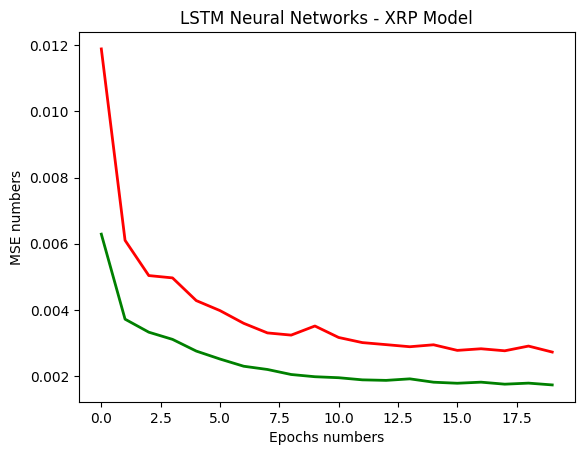

In [175]:
plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM Neural Networks - XRP Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

Medelabsolutfelet (MAE) mellan modellens förutsägelser och de verkliga målen. Detta är ett vanligt sätt att utvärdera en regressionsmodells prestanda.

In [196]:
#Skapa en serie 'targets' som innehåller de verkliga målen från testdatan 'test_data'
targets = test_data[aim][window_len:]
#Använder den tränade modellen för att göra förutsägelser på testdatan test_window_data. "squeeze" (flattar) ut resultaten till en endimensionell array.
preds = model.predict(test_window_data).squeeze()
#Beräknar medelvärdet av absolutvärdet av skillnaden mellan förutsägelserna preds och de verkliga målen test_target_values. Detta ger MAE mellan modellens förutsägelser och de verkliga målen på testdatan.
mean_absolute_error(preds, test_target_values)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


0.03134512181485381

medelkvadratfelet (MSE=mean squared error) mellan modellens förutsägelser och de verkliga målen på testdatan. MSE är en annan vanlig måttstock för att utvärdera prestanda hos en regressionsmodell, och det mäter genomsnittet av kvadraten på skillnaden mellan varje förutsagt värde och det faktiska värdet.

Det är en bra praxis att använda både MSE och MAE för att utvärdera prestanda hos en regressionsmodell, eftersom de båda ger olika aspekter av modellens fel. MSE ger mer vikt åt stora fel på grund av kvadreringen, medan MAE ger en bättre uppfattning om genomsnittlig absolut felstorlek.

In [197]:
#Beräknar medelvärdet av kvadraten av skillnaden mellan varje element i preds (modellens förutsägelser) och motsvarande element i 
# test_target_values (de verkliga målen på testdatan). Detta ger dig MSE mellan modellens förutsägelser och de verkliga målen.
from sklearn.metrics import mean_squared_error
SCORE_MSE=mean_squared_error(preds, test_target_values)
SCORE_MSE

0.0017354298971529703

R2-score, förklaringsgraden, är ett användbart verktyg för att bedöma modellens prestanda. R2-score är ett mått på hur väl den beroende variabeln förklaras av den oberoende variabeln i modellen. Det ger en indikation på hur bra modellen passar dina data jämfört med en enkel genomsnittsmodell.

In [198]:
from sklearn.metrics import r2_score
r2_score=r2_score(test_target_values, preds)
r2_score*100

81.84053651270767

[37550.15534282 37270.23222756 36934.27994227 34768.46408272
 32928.16125989 33269.57578343 33411.64681149 34182.62274349
 34757.1410948  34533.19536781 34536.92304444 32738.68021846
 31272.19567966 29096.97943389 27923.2493813  28322.40778136
 28190.43873644 29212.27821541 30248.92246628 29434.64270926
 29756.7367065  30101.00201058 30375.07275045 29243.85314322
 28881.25912833 28279.24675822 27851.60161686 24116.40857905
 21929.39162904 22734.08534753 22749.63575935 22853.0833993
 22977.59362864 22762.8326118  23887.93659794 24638.50629091
 24757.57765436 25073.1259346  25873.38546562 25036.64613795
 24300.5798893  26919.94079566 27922.67771149 28181.91032553
 28656.98507309 28740.85542536 29494.3250227  28940.1291132
 27563.04405546 27138.77388    26883.20892155 27468.75915122
 29381.5157547  29374.2961086  27253.70612144 26115.8611176
 25882.41044706 24891.57064104 24287.44529343 24550.16071653
 24468.35848033 24692.89336079 25924.84979391 26345.17757893
 25385.54606533 27252.05198

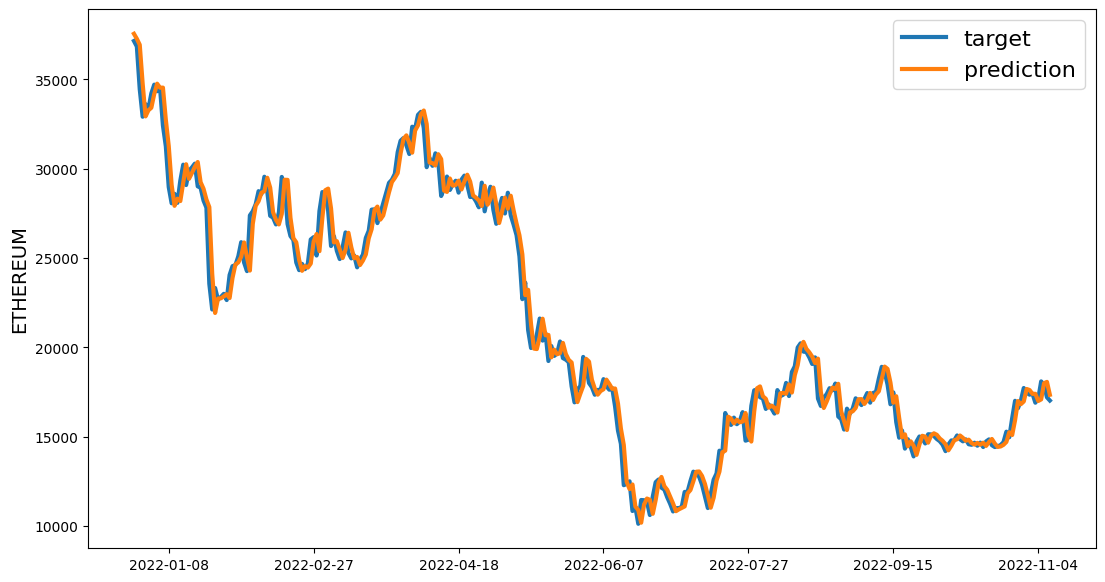

In [199]:
preds = test_data[aim].values[:-window_len] * (preds + 1)
print(preds)  
preds = pd.Series(index=targets.index, data=preds)
print(preds)
line_plot(targets, preds, 'target', 'prediction', lw=3)

In [180]:
print(targets.index[-1])

2022-11-08 00:00:00


In [181]:
print(preds.index[-1])

2022-11-08 00:00:00


In [208]:
from datetime import datetime

# Skapa ett datetime-objekt för det specifika datumet
specifikt_datum = datetime(2022, 1, 1).date()

# Omvandla specifikt_datum till ett strängformat som matchar indexformatet i preds
specifikt_datum_str = specifikt_datum.strftime('%Y-%m-%d')

# Komma åt värdet för det specifika datumet i preds
pred_värde_för_specifikt_datum = preds.loc[specifikt_datum_str]
print(f"Värdet för det prediktade datumet, {specifikt_datum_str} är:", int(pred_värde_för_specifikt_datum))

# Komma åt värdet för det specifika datumet i targets
target_värde_för_specifikt_datum = targets.loc[specifikt_datum_str]
print(f"Värdet för target datumet,{specifikt_datum_str} är:", target_värde_för_specifikt_datum)




Värdet för det prediktade datumet, 2022-01-01 är: 33269
Värdet för target datumet,2022-01-01 är: 33362


In [234]:
from datetime import datetime
import numpy as np

# Förbered datan för det framtida datumet
future_date = datetime(2022, 11, 9)  # Ange det framtida datumet här
future_date_index = len(test_data) + 1  # Index för det framtida datumet i testdatan
future_data = test_data.copy()  # Skapa en kopia av testdatan
future_data.loc[future_date] = np.nan  # Lägg till det framtida datumet med saknade värden
future_data_window = extract_window_data(future_data, window_len)  # Förbered datan för LSTM-modellen

# Gör en prognos med den tränade modellen
# Gör en prognos med den tränade modellen
future_prediction = model.predict(future_data_window[future_date_index-1:future_date_index].reshape(1, window_len, 1))


print("Framtida förutsägelse för priset:", future_prediction)


ValueError: cannot reshape array of size 0 into shape (1,5,1)

In [235]:
print(future_date_index)

323


In [236]:
print(future_data_window)

[[[ 0.        ]
  [-0.0155207 ]
  [ 0.01448961]
  [ 0.00442286]
  [ 0.01815271]]

 [[ 0.        ]
  [ 0.03048344]
  [ 0.02025798]
  [ 0.03420429]
  [ 0.02384102]]

 [[ 0.        ]
  [-0.00992297]
  [ 0.00361078]
  [-0.00644592]
  [-0.0147106 ]]

 ...

 [[ 0.        ]
  [-0.02928174]
  [-0.01601883]
  [ 0.03915715]
  [ 0.02819085]]

 [[ 0.        ]
  [ 0.01366298]
  [ 0.07050334]
  [ 0.05920625]
  [ 0.01780328]]

 [[ 0.        ]
  [ 0.05607422]
  [ 0.0449294 ]
  [ 0.00408449]
  [-0.00636014]]]


In [222]:
antal_dagar = 5
# Lägg till antal dagar till det sista datumet
future_date = targets.index[-1] + pd.Timedelta(days=antal_dagar)
print(future_date)

# Skapa ett datetime-objekt för det specifika datumet
#specifikt_datum = datetime(2022, 1, 1).date()

# Förbered datointervalldata för modellen
#future_data = pd.DataFrame(index=[future_date])
#print(future_data)

# Skapa DataFrame med det framtida datumet som index och kolumnerna "Date" och "Price"
future_data = pd.DataFrame(data={"Date": [future_date], "Price": [0]}, columns=["Date", "Price"])

# Konvertera datatypen för kolumnen "Price" till float
future_data['Price'] = future_data['Price'].astype(float)

# Omvandla specifikt_datum till ett strängformat som matchar indexformatet i preds
#future_date_str = future_date.strftime('%Y-%m-%d')
#print(future_date_str)


# Gör en förutsägelse för det framtida datumet
future_prediction = model.predict(future_data)

print("Framtida förutsägelse för priset:", future_prediction)

2022-11-13 00:00:00


ValueError: Invalid dtype: datetime64[ns]

In [186]:
print(future_date)

2022-11-13 00:00:00


In [223]:
import pandas as pd

# Antal dagar att lägga till
antal_dagar = 5

# Omvandla `targets` till ett pandas datetime-index om det inte redan är det
targets = pd.to_datetime(targets)

# Beräkna det framtida datumet
future_date = targets.index[-1] + pd.Timedelta(days=antal_dagar)

# Gör en förutsägelse för det framtida datumet
future_prediction = model.predict(future_date)

print("Framtida förutsägelse för priset:", future_prediction)





ValueError: Unrecognized data type: x=2022-11-13 00:00:00 (of type <class 'pandas._libs.tslibs.timestamps.Timestamp'>)

In [ ]:
print(future_date)

2022-11-13 00:00:00


In [224]:
future_prediction = model.predict(test_window_data[-1:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [225]:
print(future_prediction)

[[0.02624772]]


TypeError: unsupported operand type(s) for -: 'numpy.float32' and 'Timestamp'

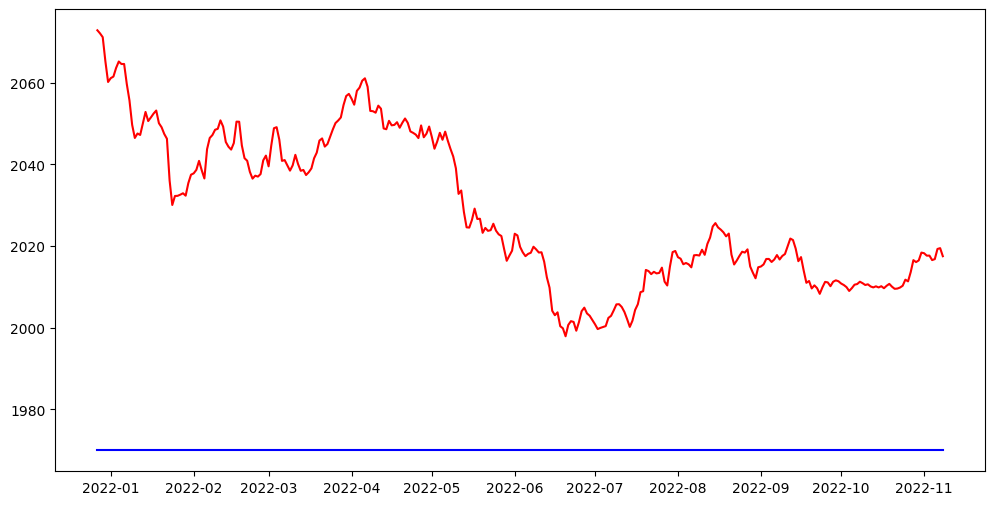

In [226]:
import pandas as pd
import matplotlib.pyplot as plt


# Skapa en pandas Series för framtida förutsägelse
future_prediction_series = pd.Series(index=[future_date], data=future_prediction.flatten())

# Plot förutsägelser och målvariabler
plt.figure(figsize=(12, 6))
plt.plot(targets.index, targets, label='Actual', color='blue')  # faktiska värden
plt.plot(preds.index, preds, label='Prediction', color='red')  # förutsägelser

# Plotta också future_prediction
#plt.plot(future_prediction_series.index, future_prediction_series, 'ro', label='Future Prediction')  # framtida förutsägelse

# Plotta en pil för att visa den framtida förutsägelsen
plt.arrow(targets.index[-1], targets.iloc[-1], 1, future_prediction_series.values[0] - targets.iloc[-1], 
width=0.1, head_width=0.3, head_length=0.2, color='green', label='Future Prediction')

# Ställ in etiketter och titel
plt.xlabel('Datum')
plt.ylabel('Värde')
plt.title('Förutsägelser jämfört med faktiska värden inklusive framtida förutsägelse')
plt.legend()

# Visa plotten
plt.show()







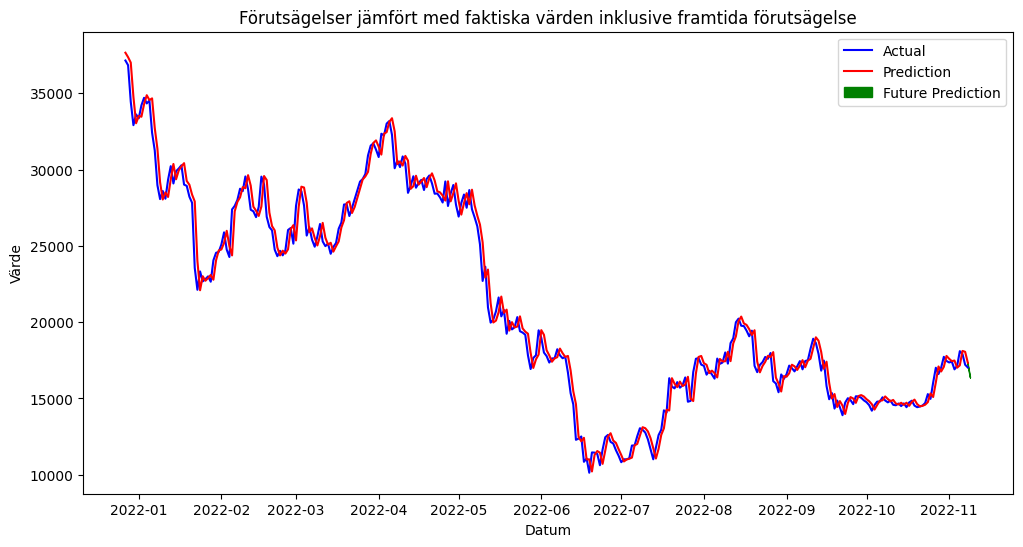

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lägg till en dag till det sista datumet
future_date = targets.index[-1] + pd.Timedelta(days=1)

# Skapa en pandas Series för framtida förutsägelse
future_prediction_series = pd.Series(index=[future_date], data=future_prediction.flatten())

# Plot förutsägelser och målvariabler
plt.figure(figsize=(12, 6))
plt.plot(targets.index, targets, label='Actual', color='blue')  # faktiska värden
plt.plot(preds.index, preds, label='Prediction', color='red')  # förutsägelser

# Bestäm startpositionen för pilen (där förutsägelsen slutar)
start_x = preds.index[-1]
start_y = preds.iloc[-1]

# Bestäm slutpositionen för pilen (en viss längd ner på y-axeln från startpositionen)
end_x = start_x + pd.Timedelta(days=1)
#end_y = start_y + pd.Timedelta(days=1)
end_y = start_y - 1000.0  # Justera detta värde för att ändra längden på pilen

# Plotta pilen för att visa den framtida förutsägelsen
plt.arrow(start_x, start_y, 1, end_y - start_y, 
          width=0.1, head_width=0.3, head_length=0.2, color='green', label='Future Prediction')

# Ställ in etiketter och titel
plt.xlabel('Datum')
plt.ylabel('Värde')
plt.title('Förutsägelser jämfört med faktiska värden inklusive framtida förutsägelse')
plt.legend()

# Visa plotten
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


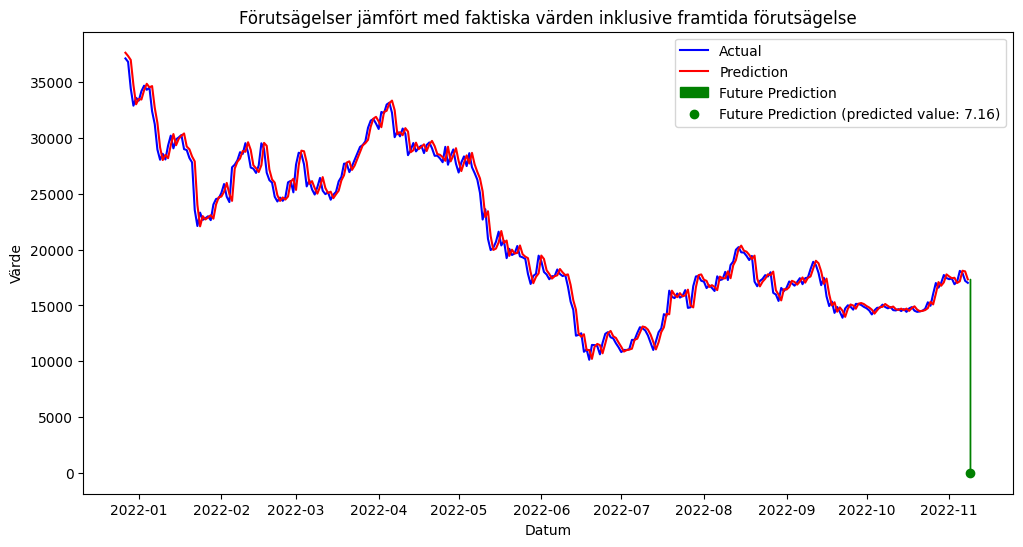

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lägg till en dag till det sista datumet för att få det framtida datumet
future_date = targets.index[-1] + pd.Timedelta(days=1)

# Omvandla tidstämpeln till ett numeriskt värde (t.ex. Unix-timestamp)
future_date_numeric = future_date.timestamp()

# Använd modellen för att göra en förutsägelse för det framtida y-värdet
future_prediction = model.predict(np.array([[future_date_numeric]]).reshape(1, 1, 1))

# Plot förutsägelser och målvariabler
plt.figure(figsize=(12, 6))
plt.plot(targets.index, targets, label='Actual', color='blue')  # faktiska värden
plt.plot(preds.index, preds, label='Prediction', color='red')  # förutsägelser

# Plotta en pil för att visa den framtida förutsägelsen
plt.arrow(future_date, preds[-1], 0, future_prediction[0][0] - preds[-1], 
          width=0.1, head_width=0.3, head_length=0.2, color='green', label='Future Prediction')

# Skriv ut den förutsagda framtida punkten
plt.scatter(future_date, future_prediction[0][0], color='green', label=f'Future Prediction (predicted value: {future_prediction[0][0]:.2f})')

# Ställ in etiketter och titel
plt.xlabel('Datum')
plt.ylabel('Värde')
plt.title('Förutsägelser jämfört med faktiska värden inklusive framtida förutsägelse')
plt.legend()

# Visa plotten
plt.show()











In [214]:
import pandas as pd
import numpy as np

def get_predicted_x_for_date(model, input_date, test_data, aim, window_len):
    # Omvandla datumet till det format som modellen förväntar sig
    input_timestamp = pd.Timestamp(input_date)
    input_numeric = input_timestamp.timestamp()
    
    # Förutsäg x-värdet för det angivna datumet med modellen
    input_data = np.array([[input_numeric]]).reshape(1, 1, 1)
    predicted_y = model.predict(input_data)
    
    # Beräkna det förutsagda x-värdet baserat på det förutsagda y-värdet
    predicted_x = (test_data[aim].values[-window_len] * (predicted_y + 1)).squeeze()
    
    return predicted_x

# Användning av funktionen
input_date = '2020-04-10'
predicted_x_value = get_predicted_x_for_date(model, input_date, test_data, aim, window_len)
print("Förutsagt x-värde för datumet", input_date, "är:", predicted_x_value)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Förutsagt x-värde för datumet 2020-04-10 är: 95389.26
